<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML%26DL/11%EC%9B%94%2030%EC%9D%BC/11%EC%9B%94_30%EC%9D%BC_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ozone.csv 파일 이용하여 머신러닝 모델 구현하기
- python, tenserflow, sklearn 3가지 모두 각각 구현할 예정

## python ver.

In [ ]:
# 필요 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 수치미분 코드
def numerical_derivative(f,x):
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)   #  [0.0 0.0]

    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:

        idx = it.multi_index

        tmp = x[idx]
        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)  # f(x + delta_x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x) # f(x - delta_x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ozone.csv')
df

training_data = df[['Temp','Ozone']]
training_data

# 이렇게 데이터를 가져온 후 당연히 데이터 전처리를 해야 해요!
# 1. 결측치 처리!
#    - 지금은 그냥 냅다 삭제할 거에요!(데이터가 많은 경우 가장 좋은 방법)
training_data = training_data.dropna(how='any')
training_data

# Traingin DataSet 준비
x_data = training_data['Temp'].values.reshape(-1,1)  #(-1.1) -> 1개의 열 가지고 있고 나머지는 모두 행으로 ㄱㄱ
t_data = training_data['Ozone'].values.reshape(-1,1)

# Model을 만들어야 하는데.. y = Wx + b
W = np.random.rand(1,1)  # 어떤 값을 설정해야 하는지 모르기 때문에 처음에는 랜덤 값을 받는다
b = np.random.rand(1)

# loss function -> W와 b 값에 의해 결정되는 함수이므로 W,b가 들어와야 함
def loss_func(input_data):
    input_W = input_data[0]
    input_b = input_data[1]

    y = np.dot(x_data,input_W) + input_b
    return np.mean(np.power((t_data-y),2))

# 모델이 완성된 후 예측하는 함수를 하나 만들어요!
def predict(x):
    return np.dot(x, W) + b

# learning rate 정의(hyperparameter -> 내가 정하는 것)
learning_rate = 1e-4  # 1e-4 -> learning_rate 설정하는 기준

# 학습진행
for step in range(300000):
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(-1,1)
    b = b - derivative_result[1]

    if step % 30000 == 0:
        print(f'W : {W}, b : {b}, loss : {loss_func(input_param)}')

W : [[0.58069641]], b : [0.48237609], loss : 907.1788769528366
W : [[0.71773395]], b : [-11.80157584], loss : 817.6348630495228
W : [[0.86024414]], b : [-23.06215816], loss : 775.3343645067616
W : [[0.99088437]], b : [-33.38482316], loss : 739.7869962451716
W : [[1.1106433]], b : [-42.84769193], loss : 709.91464405314
W : [[1.22042726]], b : [-51.52237869], loss : 684.8113109762212
W : [[1.32106708]], b : [-59.47453274], loss : 663.7156393827058
W : [[1.4133244]], b : [-66.76433535], loss : 645.9878197892441
W : [[1.49789742]], b : [-73.44695514], loss : 631.090186113785
W : [[1.57542618]], b : [-79.57296563], loss : 618.5709088299574


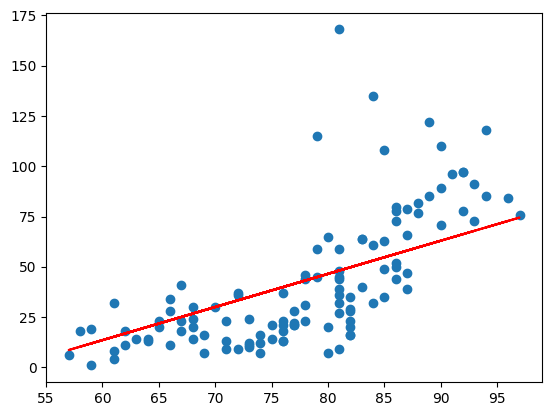

In [ ]:
# 학습이 끝났으니 결과 예측해볼까요?
# 온도가 62도 일때의 오존 수치 예측
predict(np.array([[62]]))

# 이 수치가 맞는지 모르겠으니 그래프로 확인
plt.scatter(x_data, t_data)
plt.plot(x_data, x_data*W.ravel() + b, color ='r')

## tensorflow를 이용한 구현

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ozone.csv')
df

training_data = df[['Temp','Ozone']]
training_data

training_data = training_data.dropna(how='any')
training_data

# Traingin DataSet 준비
x_data = training_data['Temp'].values.reshape(-1,1)  #(-1.1) -> 1개의 열 가지고 있고 나머지는 모두 행으로 ㄱㄱ
t_data = training_data['Ozone'].values.reshape(-1,1)

# model 생성
model = Sequential()
model.add(Flatten(input_shape=(1,)))

output_layer = Dense(units=1,
                     activation='linear')
model.add(output_layer)

# model 설정
model.compile(optimizer=SGD(learning_rate = 1e-4),
              loss='mse')

# Model
model.fit(x_data,
          t_data,
          epochs=2000,
          verbose=0)

1/1 [==============================] - 0s 20ms/step


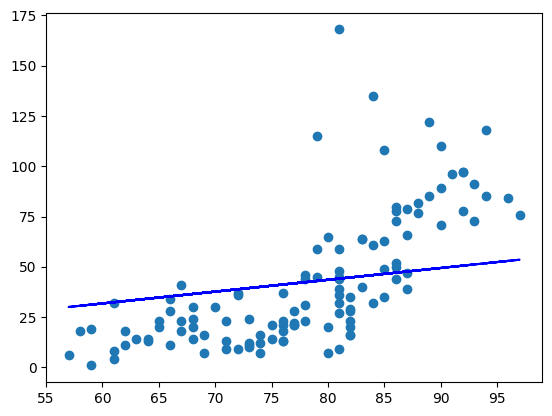

In [ ]:
# 학습을 완료했으니 결과를 예측해볼까요?
model.predict(np.array(([[62]])))

# 마찬가지로 그래프로 그려서 표현해보기
weight, bias = output_layer.get_weights()
plt.scatter(x_data, t_data)
plt.plot(x_data, x_data*weight + bias, color='b')

# sklearn 모델로 구현하기

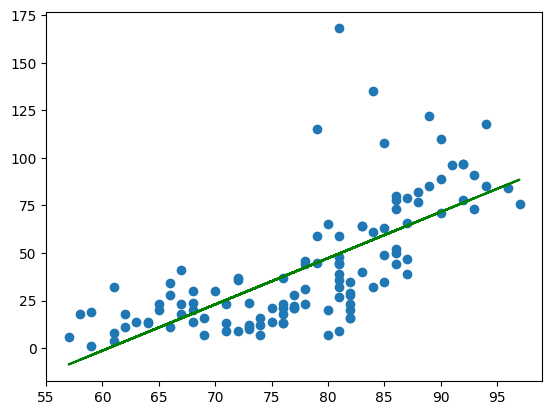

In [ ]:
from sklearn import linear_model
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ozone.csv')

training_data = df[['Temp','Ozone']]

# 이렇게 데이터를 가져온 후 당연히 데이터 전처리를 해야 해요!
# 1. 결측치 처리!
#    - 지금은 그냥 냅다 삭제할 거에요!(데이터가 많은 경우 가장 좋은 방법)
training_data = training_data.dropna(how='any')
training_data

# Traingin DataSet 준비
x_data = training_data['Temp'].values.reshape(-1,1)  #(-1.1) -> 1개의 열 가지고 있고 나머지는 모두 행으로 ㄱㄱ
t_data = training_data['Ozone'].values.reshape(-1,1)

# Model 생성
sklearn_model = linear_model.LinearRegression()

# Model 학습
sklearn_model.fit(x_data, t_data)

# W와 b를 알아야 그래프 그릴 수 있겠죠
weights = sklearn_model.coef_
bias = sklearn_model.intercept_

# 예측을 해보아요!
sklearn_model.predict(np.array([[62]]))

plt.scatter(x_data,t_data)
plt.plot(x_data, x_data*weights + bias, color='g')

# 3가지 방식 결과가 모두 다른데 그 이유는?
# 데이터에서 발견되는 이상치 때문
# 이상치를 해결하는 방법에는 여러가지 있지만 2가지만 알면 된다
# Tukey fense, zscore(정규분포)

## 1. Tukey fense
- 사분위수를 사용
- IQR Value를 사용하여 구함(3사분위 - 1사분위)

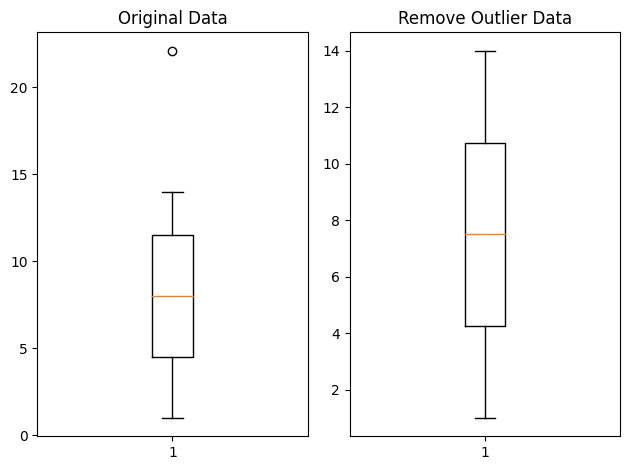

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])

fig = plt.figure()
fig_1 = fig.add_subplot(1,2,1)
fig_2 = fig.add_subplot(1,2,2)

# 중위값, 1,3사분위 구하기
np.median(data)
np.percentile(data,25)  # 1사분위
np.percentile(data,75)  # 3사분위

# IQR Value 구하기
iqr_value = np.percentile(data,75) - np.percentile(data,25)
iqr_value

# 이상치 구분하는 기준선 구하기
upper_fence = np.percentile(data,75) + 1.5*iqr_value
lower_fence = np.percentile(data,25) - 1.5*iqr_value

# 가지고 있는 data에 대한 이상치 구하기
data[(data > upper_fence) | (data < lower_fence)]

# 우리의 목적은 데이터 정제! -> 기준선 안의 값 추출
result_data = data[(data <= upper_fence) & (data >= lower_fence)]
result_data

# 이상치 처리 전후 차이 그래프로 비교
fig_1.set_title('Original Data')
fig_1.boxplot(data)

fig_2.set_title('Remove Outlier Data')
fig_2.boxplot(result_data)

plt.tight_layout()
plt.show()

# 2. 정규분포(zscore)

1.   가지고 있는 데이터를 정규분포 시켜 데이터에 대한 zscore를 구해야
2.   그 이후 기준치를 설정하여 기준치를 넘는 데이터를 이상치로 판별



In [ ]:
# 필요 라이브러리 호출
from scipy import stats
data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])

zscore_threshold = 2.0
outlier = data[np.abs(stats.zscore(data)) > zscore_threshold]  # 상위, 하위 이상치 모두 한번에 제거하기 위해 abs 사용

# 이상치 제거한 결과
data[np.isin(data,outlier,invert=True)]  #invert -> True는 False로, False는 True로 바꿔줌


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.])

In [ ]:
# python, tensorflow, sklearn으로 구현을
# 이상치 제거한 데이터 이용해서 학습시키고 결과 그래프를 출력해보아요!
# 62도에서의 예측치도 구해보기!

In [ ]:
# 3가지 구현에 모두 쓸 수 있게 이상치 제거 해놓기
# 구현은 이미 위에 작성한 코드 그래도 가져와 쓰면됨
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Raw Data Set
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ozone.csv')
df

training_data = df[['Temp','Ozone']]

# 결측치 제거
training_data = training_data.dropna(how='any')

# 이상치 제거
zscore_threshold = 1.8
outlier = training_data['Ozone'][np.abs(stats.zscore(training_data['Ozone'].values)) > zscore_threshold]

# 이상치를 제거한 데이터 프레임 - loc 이용하여 값 설정 할 수 있음
training_data = training_data.loc[np.isin(training_data['Ozone'], outlier, invert=True)]

# Traingin Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

In [ ]:
# Python 구현
# 필요 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 수치미분 코드
def numerical_derivative(f,x):
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)   #  [0.0 0.0]

    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:

        idx = it.multi_index

        tmp = x[idx]
        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)  # f(x + delta_x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x) # f(x - delta_x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# Model을 만들어야 하는데.. y = Wx + b
W = np.random.rand(1,1)  # 어떤 값을 설정해야 하는지 모르기 때문에 처음에는 랜덤 값을 받는다
b = np.random.rand(1)

# loss function -> W와 b 값에 의해 결정되는 함수이므로 W,b가 들어와야 함
def loss_func(input_data):
    input_W = input_data[0]
    input_b = input_data[1]

    y = np.dot(x_data,input_W) + input_b
    return np.mean(np.power((t_data-y),2))

# 모델이 완성된 후 예측하는 함수를 하나 만들어요!
def predict(x):
    return np.dot(x, W) + b

# learning rate 정의(hyperparameter -> 내가 정하는 것)
learning_rate = 1e-4  # 1e-4 -> learning_rate 설정하는 기준

# 학습진행
for step in range(300000):
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(-1,1)
    b = b - derivative_result[1]

    if step % 30000 == 0:
        print(f'W : {W}, b : {b}, loss : {loss_func(input_param)}')

W : [[0.49321281]], b : [0.59363742], loss : 494.26958719490136
W : [[0.62746369]], b : [-10.03973229], loss : 456.3563491306141
W : [[0.75153788]], b : [-19.77923119], loss : 424.7114833335831
W : [[0.86518222]], b : [-28.70001349], loss : 398.16323233367484
W : [[0.96927344]], b : [-36.87090172], loss : 375.8907526344418
W : [[1.0646146]], b : [-44.35493307], loss : 357.20540300471464
W : [[1.15194125]], b : [-51.20984574], loss : 341.52945243699793
W : [[1.23192708]], b : [-57.48852437], loss : 328.37821732121085
W : [[1.30518919]], b : [-63.23940805], loss : 317.3450755462125
W : [[1.37229278]], b : [-68.50686398], loss : 308.0888941795798


In [ ]:
predict(np.array([[62]]))

array([[15.56134641]])

In [ ]:
# tensorflow 구현
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# model 생성
model = Sequential()
model.add(Flatten(input_shape=(1,)))

output_layer = Dense(units=1,
                     activation='linear')
model.add(output_layer)

# model 설정
model.compile(optimizer=SGD(learning_rate = 1e-4),
              loss='mse')

# Model
model.fit(x_data,
          t_data,
          epochs=2000,
          verbose=0)

In [ ]:
# 예측하기
predict(np.array([[62]]))
weight, bias = output_layer.get_weights()

In [ ]:
#sklearn
from sklearn import linear_model

# Model 생성
sklearn_model = linear_model.LinearRegression()

# Model 학습
sklearn_model.fit(x_data, t_data)

# W와 b를 알아야 그래프 그릴 수 있겠죠
weights = sklearn_model.coef_
bia = sklearn_model.intercept_

# 예측을 해보아요!
sklearn_model.predict(np.array([[62]]))

array([[3.58411393]])

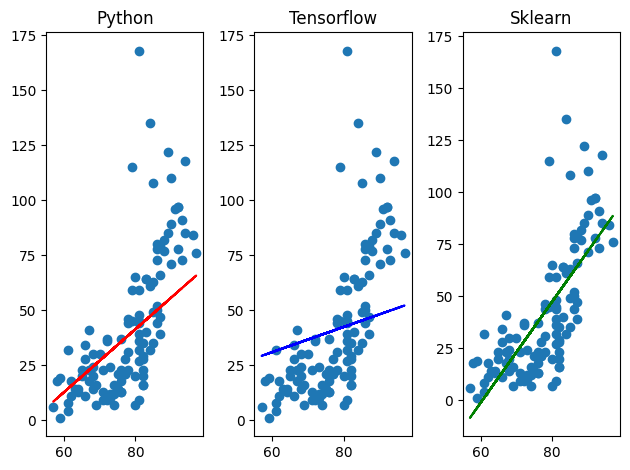

In [ ]:
# 3가지 모델 결과 모두 한번에 그래프로 알아보게 그리기
fig = plt.figure()

fig_python = fig.add_subplot(1,3,1)
fig_tensorflow = fig.add_subplot(1,3,2)
fig_sklearn = fig.add_subplot(1,3,3)

fig_python.set_title('Python')
fig_tensorflow.set_title('Tensorflow')
fig_sklearn.set_title('Sklearn')

fig_python.scatter(x_data, t_data)
fig_python.plot(x_data, x_data*W + b, color = 'r')

fig_tensorflow.scatter(x_data, t_data)
fig_tensorflow.plot(x_data, x_data*weight + bias, color = 'b')

fig_sklearn.scatter(x_data, t_data)
fig_sklearn.plot(x_data, x_data*weights + bia, color='g')

plt.tight_layout()
plt.show()